# About Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.

# Importing Librairies

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [41]:
df = pd.read_csv('diabetes.csv')
df.head()
df.shape

(768, 9)

Handle Missing Values:
Check for and handle missing values if any.

In [27]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Visualization

In [28]:
diabetes_counts = df['Outcome'].value_counts()

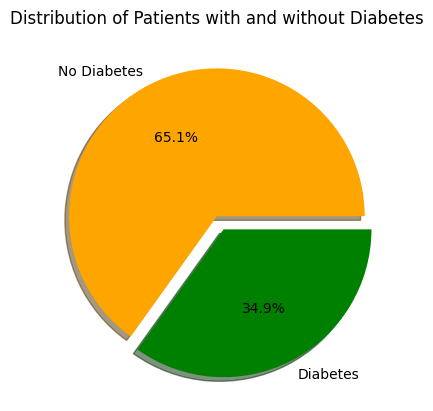

In [30]:
labels = ['No Diabetes', 'Diabetes']
colors = ['orange', 'green']
explode = (0, 0.1)  
plt.pie(diabetes_counts, labels=labels, colors=colors, autopct='%1.1f%%', explode=explode, shadow=True)
plt.title('Distribution of Patients with and without Diabetes')
plt.show()


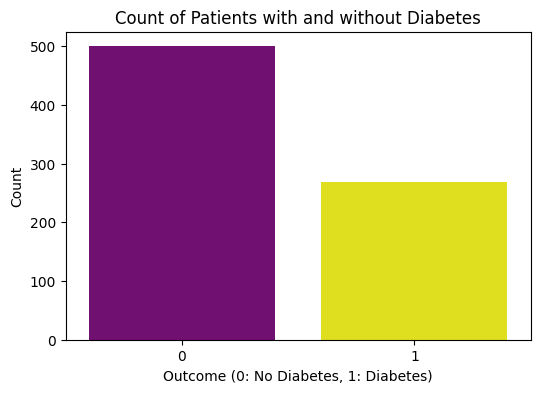

In [47]:
colors = ['purple' , 'yellow']
plt.figure(figsize = (6 ,4))
sns.countplot(x='Outcome', data=df ,hue = 'Outcome' , legend = False , palette = colors)
plt.title('Count of Patients with and without Diabetes')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.show()

Split the Data:
Split the dataset into features (X) and the target variable (y).

In [31]:
X = df.drop('Outcome' , axis = 1)
y = df['Outcome']

Split into Training and Testing Sets:
Divide the data into training and testing sets.

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X , y ,test_size=0.2,random_state = 42)

Feature Scaling:
Standardize the features using StandardScaler.

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building and Training a Model

In [34]:
model = LogisticRegression()
model.fit(X_train , y_train)

LogisticRegression()

Make Predictions:
Use the trained model to make predictions on the test set.

In [35]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

## Evaluation

Ploting a confusion matrix to visualize the true positive, true negative, false positive, and false negative predictions.

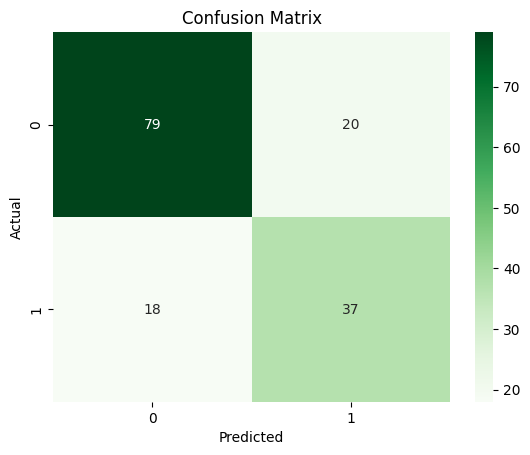

In [36]:
fig_CM = confusion_matrix(y_test, y_pred)
sns.heatmap(fig_CM, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Visualization of  the precision-recall 

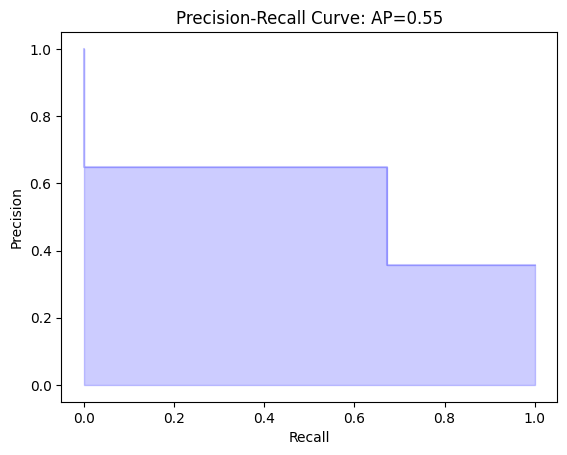

In [37]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve: AP={average_precision:.2f}')
plt.show()


# Prediction 

In [38]:
new_data = pd.DataFrame({
    'Pregnancies': [3],
    'Glucose': [110],
    'BloodPressure': [70],
    'SkinThickness': [30],
    'Insulin': [80],
    'BMI': [25.5],
    'DiabetesPedigreeFunction': [0.25],
    'Age': [25]
})


In [39]:
data_scaled = scaler.transform(new_data)


In [40]:
new_predictions = model.predict(data_scaled)
print("Predictions for new data:", new_predictions)

Predictions for new data: [0]
